In [1]:
import pandas as pd
import numpy as np
from functools import partial
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK, Trials
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
import itertools
import matplotlib.pyplot as plt

import mlflow
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

RANDOM_SEED = 42

In [3]:
df_final = pd.read_csv('../data/df_final_sc.csv')
df_final.head()

,Attrition,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Age_category_Middle,Age_category_Old,Age_category_Young,DailyRate_category_High,DailyRate_category_Middle,DailyRate_category_Small,DistanceFromHome_category_Close,DistanceFromHome_category_Far,DistanceFromHome_category_Middle,Education_category_High,Education_category_Middle,Education_category_Small,EnvironmentSatisfaction_category_Doesnot_Satisfied,EnvironmentSatisfaction_category_Middle,HourlyRate_category_High,HourlyRate_category_Middle,HourlyRate_category_Small,JobInvolvement_category_High,JobInvolvement_category_Middle,JobInvolvement_category_Small,JobLevel_category_High,JobLevel_category_Middle,JobLevel_category_Small,JobSatisfaction_category_Doesnot_Satisfied,JobSatisfaction_category_Middle,MonthlyIncome_category_High,MonthlyIncome_category_Middle,MonthlyIncome_category_Small,MonthlyRate_category_High,MonthlyRate_category_Middle,MonthlyRate_category_Small,NumCompaniesWorked_category_Few,NumCompaniesWorked_category_Many,NumCompaniesWorked_category_Middle,PercentSalaryHike_category_High,PercentSalaryHike_category_Middle,PercentSalaryHike_category_Small,PerformanceRating_category_High,PerformanceRating_category_Small,RelationshipSatisfaction_category_Doesnot_Satisfied,RelationshipSatisfaction_category_Middle,StockOptionLevel_category_High,StockOptionLevel_category_Middle,StockOptionLevel_category_Small,TotalWorkingYears_category_Few,TotalWorkingYears_category_Many,TotalWorkingYears_category_Middle,TrainingTimesLastYear_category_Few,TrainingTimesLastYear_category_Many,TrainingTimesLastYear_category_Middle,WorkLifeBalance_category_High,WorkLifeBalance_category_Middle,WorkLifeBalance_category_Small,YearsAtCompany_category_Few,YearsAtCompany_category_Many,YearsAtCompany_category_Middle,YearsInCurrentRole_category_Few,YearsInCurrentRole_category_Many,YearsInCurrentRole_category_Middle,YearsSinceLastPromotion_category_Few,YearsSinceLastPromotion_category_Many,YearsSinceLastPromotion_category_Middle,YearsWithCurrManager_category_Few,YearsWithCurrManager_category_Many,YearsWithCurrManager_category_Middle,std_Age,std_DailyRate,std_DistanceFromHome,std_Education,std_EnvironmentSatisfaction,std_HourlyRate,std_JobInvolvement,std_JobLevel,std_JobSatisfaction,std_MonthlyIncome,std_MonthlyRate,std_NumCompaniesWorked,std_PercentSalaryHike,std_PerformanceRating,std_RelationshipSatisfaction,std_StockOptionLevel,std_TotalWorkingYears,std_TrainingTimesLastYear,std_WorkLifeBalance,std_YearsAtCompany,std_YearsInCurrentRole,std_YearsSinceLastPromotion,std_YearsWithCurrManager
0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0.446350,0.742527,-1.010909,-0.891688,-0.660531,1.383138,0.379672,-0.057788,1.153254,-0.108350,0.726020,2.125136,-1.150554,-0.426230,-1.584178,-0.932014,-0.421642,-2.171982,-2.493820,-0.164613,-0.063296,-0.679146,0.245834
1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1.322365,-1.297775,-0.147150,-1.868426,0.254625,-0.240677,-1.026167,-0.057788,-0.660853,-0.291719,1.488876,-0.678049,2.129306,2.346151,1.191438,0.241988,-0.164511,0.155707,0.338096,0.488508,0.764998,-

In [ ]:
df_final.shape

In [4]:
df_train, df_test = train_test_split(df_final, stratify=df_final['Attrition'], test_size=0.2, random_state=RANDOM_SEED)

X_train = df_train.drop('Attrition', axis = 1)
y_train = df_train['Attrition']

X_test = df_test.drop('Attrition', axis = 1)
y_test = df_test['Attrition']

In [9]:
log_reg_model = LogisticRegression(n_jobs=-1, random_state=RANDOM_SEED)
mlp_model = MLPClassifier(shuffle = True, early_stopping = True, random_state = RANDOM_SEED)

In [10]:
models = [log_reg_model, mlp_model]

In [11]:
for model in models:
    model.fit(X_train, y_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test) 
    accuracy_score_test = accuracy_score(y_test, y_pred_test)
    f1_test = f1_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:, 1])
    
    print(f'Модель: {type(model).__name__}\nAccuracy: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')

Модель: LogisticRegression
Accuracy: 0.8605442176870748
f1 score: 0.4383561643835616
Precision: 0.6153846153846154
Recall: 0.3404255319148936
ROC_AUC: 0.8117839607201308

Модель: MLPClassifier
Accuracy: 0.8707482993197279
f1 score: 0.4242424242424243
Precision: 0.7368421052631579
Recall: 0.2978723404255319
ROC_AUC: 0.7888707037643209



In [12]:
log_reg_model = LogisticRegression(C = 0.1, n_jobs=-1, random_state=RANDOM_SEED)
mlp_model = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes= [100, 100], shuffle = True, early_stopping = True, random_state = RANDOM_SEED)
models = [log_reg_model, mlp_model]

In [13]:
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test) 
    accuracy_score_test = accuracy_score(y_test, y_pred_test)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:, 1])
    
    print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nAccuracy_test: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')

Модель: LogisticRegression
Accuracy_train: 0.8954081632653061
Accuracy_test: 0.8775510204081632
f1 score: 0.4545454545454545
Precision: 0.7894736842105263
Recall: 0.3191489361702128
ROC_AUC: 0.8107502799552072

Модель: MLPClassifier
Accuracy_train: 0.9217687074829932
Accuracy_test: 0.8843537414965986
f1 score: 0.5526315789473684
Precision: 0.7241379310344828
Recall: 0.44680851063829785
ROC_AUC: 0.8087690584891034



In [14]:
# Функция для построения матрицы ошибок

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
 
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
 
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
mlp_model = MLPClassifier(solver = 'adam', activation = 'relu', hidden_layer_sizes= [100, 100], shuffle = True, early_stopping = True, random_state = RANDOM_SEED)
model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_prob_test = model.predict_proba(X_test) 
accuracy_score_test = accuracy_score(y_test, y_pred_test)
accuracy_score_train = accuracy_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:, 1])
    
print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nAccuracy_test: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')

Модель: MLPClassifier
Accuracy_train: 0.9217687074829932
Accuracy_test: 0.8843537414965986
f1 score: 0.5526315789473684
Precision: 0.7241379310344828
Recall: 0.44680851063829785
ROC_AUC: 0.8087690584891034



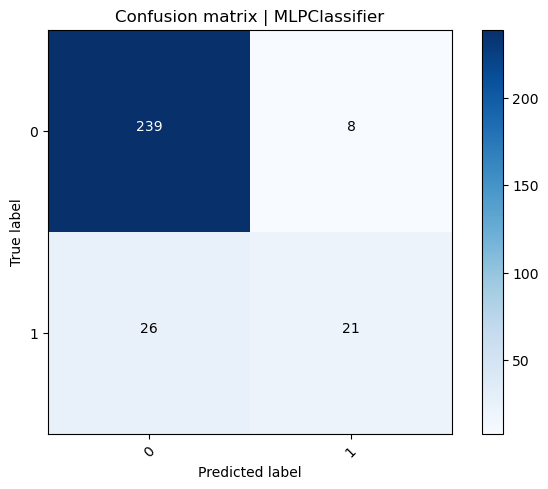

In [16]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=['0','1'],
                      title='Confusion matrix | MLPClassifier')

In [17]:
os = SMOTE(random_state=RANDOM_SEED)
features = df_train.columns.to_list()
features.remove('Attrition')
target = 'Attrition'
X_train, y_train = os.fit_resample(df_train[features], df_train[target])

<Axes: >

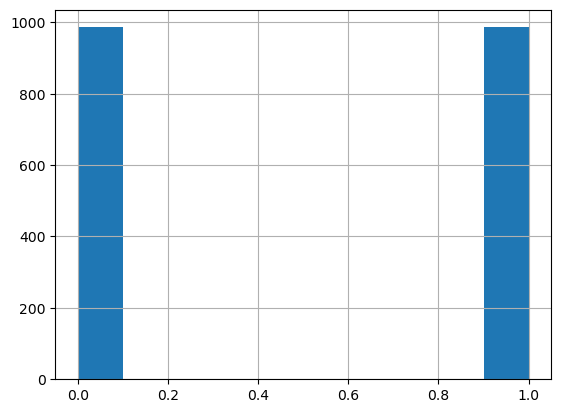

In [18]:
y_train.hist()

In [19]:
for model in models:
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_pred_prob_test = model.predict_proba(X_test) 
    accuracy_score_test = accuracy_score(y_test, y_pred_test)
    accuracy_score_train = accuracy_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    precision_test = precision_score(y_test, y_pred_test)
    recall_test = recall_score(y_test, y_pred_test)
    roc_auc_test = roc_auc_score(y_test, y_pred_prob_test[:, 1])
    
    print(f'Модель: {type(model).__name__}\nAccuracy_train: {accuracy_score_train}\nAccuracy_test: {accuracy_score_test}\nf1 score: {f1_test}\nPrecision: {precision_test}\nRecall: {recall_test}\nROC_AUC: {roc_auc_test}\n')

Модель: LogisticRegression
Accuracy_train: 0.9203853955375254
Accuracy_test: 0.8673469387755102
f1 score: 0.5411764705882353
Precision: 0.6052631578947368
Recall: 0.48936170212765956
ROC_AUC: 0.8172107847359807

Модель: MLPClassifier
Accuracy_train: 0.9898580121703854
Accuracy_test: 0.8469387755102041
f1 score: 0.49438202247191015
Precision: 0.5238095238095238
Recall: 0.46808510638297873
ROC_AUC: 0.7617365836850718



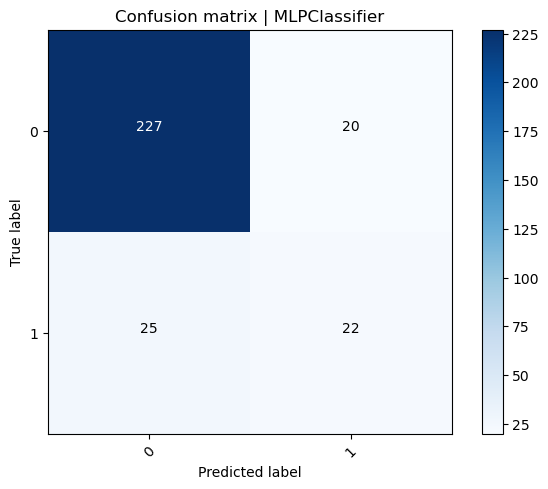

In [20]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred_test), classes=['0','1'],
                      title='Confusion matrix | MLPClassifier')

In [71]:
logreg_params = {
    'C': np.arange(0.001, 2.0, 0.001),
     'penalty': ['l1', 'l2', 'elasticnet', None],
     'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
     'class_weight': ['balanced', None],
    'multi_class' : ['auto', 'ovr', 'multinomial']
         }

gs_logreg = GridSearchCV(LogisticRegression(n_jobs = 10), logreg_params, cv = 3, scoring='roc_auc', n_jobs = 10,  error_score=0.0)
gs_logreg.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=0.0, estimator=LogisticRegression(n_jobs=10),
             n_jobs=10,
             param_grid={'C': array([1.000e-03, 2.000e-03, 3.000e-03, ..., 1.997e+00, 1.998e+00,
       1.999e+00]),
                         'class_weight': ['balanced', None],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='roc_auc')

In [72]:
print(f'params: {gs_logreg.best_params_}, score: {gs_logreg.best_score_}')

params: {'C': 1.0599999999999998, 'class_weight': None, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}, score: 0.8375681283674313


In [8]:
# mpl_params = {
#     #'hidden_layer_sizes': [np.arange(100, 1000, 10)],
#     #'hidden_layer_sizes': [np.arange(100, 1000, 100)],
#     'activation': ['identity', 'logistic', 'tanh', 'relu'],
#     'solver': ['lbfgs', 'sgd', 'adam'],
#     #'alpha': np.arange(0.0001, 1, 0.0001),
#     'alpha': np.arange(0.0001, 1, 0.01),
#     'batch_size': ['auto', np.arange(10, 100, 1)],
#     'learning_rate': ['constant', 'invscaling', 'adaptive']
#         }

# gs_mpl = GridSearchCV(MLPClassifier(shuffle = True, early_stopping = True, random_state = RANDOM_SEED), mpl_params, cv = 3, scoring='roc_auc',  error_score=0.0)
# gs_mpl.fit(X_train, y_train)

In [60]:
 print(f'params: {gs_mpl.best_params_}, score: {gs_mpl.best_score_}')

params: {'activation': 'logistic', 'alpha': 0.9701, 'batch_size': 'auto', 'learning_rate': 'constant', 'solver': 'lbfgs'}, score: 0.849430992738155


In [15]:
!pip install np_utils

Defaulting to user installation because normal site-packages is not writeable
  Using cached np_utils-0.6.0.tar.gz (61 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56454 sha256=1d90c5560eafe56c5904c9a5772cd890bde5e3389d369be82ef865bc57d1eba6
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\19\0d\33\eaa4dcda5799bcbb51733c0744970d10edb4b9add4f41beb43
Successfully built np_utils


In [24]:
import numpy as np
import os, shutil, tempfile
from hyperopt import fmin, tpe, hp, SparkTrials, STATUS_OK
from sklearn import linear_model, datasets, model_selection

In [29]:
def train_and_eval(data, C):
  """
  Trains a LASSO model using training data with the input alpha and evaluates it using test data.
  """
  df_train, df_test = train_test_split(data, stratify=data['Attrition'], test_size=0.2, random_state=RANDOM_SEED)

  X_train = df_train.drop('Attrition', axis = 1)
  y_train = df_train['Attrition']

  X_test = df_test.drop('Attrition', axis = 1)
  y_test = df_test['Attrition']
    
  model = LogisticRegression(C=C)
  model.fit(X_train, y_train)
  loss = model.score(X_test, y_test)
  return {"loss": loss, "status": STATUS_OK}
 
def tune_c(objective):
  """
  Uses Hyperopt's SparkTrials to tune the input objective, which takes alpha as input and returns loss.
  Returns the best alpha found.
  """
  best = fmin(
    fn=objective,
    space=hp.uniform("C", 0.0, 10.0),
    algo=tpe.suggest,
    max_evals=4,
    trials=SparkTrials(parallelism=2))
  return best["C"]

In [ ]:
bc_data_medium = df_final.copy()
def objective_medium(C):
  # Load broadcasted value onto workers
  data = bc_data_medium.value
  return train_and_eval(data, C)
 
tune_c(objective_medium)